In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [3]:
# 加载数据
df = pd.read_csv('../../data/kaikeba/FIFA_2018_player.csv')
df.head()

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,Spanish Primera División,Real Madrid CF,32,1985-02-05,185.0,80.0,95500000.0,565000.0
1,158023,L. Messi,Lionel Messi,Argentina,Spanish Primera División,FC Barcelona,30,1987-06-24,170.0,72.0,105000000.0,565000.0
2,190871,Neymar,Neymar da Silva Santos Jr.,Brazil,French Ligue 1,Paris Saint-Germain,25,1992-02-05,175.0,68.0,123000000.0,280000.0
3,176580,L. Suárez,Luis Suárez,Uruguay,Spanish Primera División,FC Barcelona,30,1987-01-24,182.0,86.0,97000000.0,510000.0
4,167495,M. Neuer,Manuel Neuer,Germany,German Bundesliga,FC Bayern Munich,31,1986-03-27,193.0,92.0,61000000.0,230000.0


In [4]:
# 查看数据的整体信息
df.describe()

,ID,age,height_cm,weight_kg,eur_value,eur_wage
count,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000
mean,207791.796543,25.120151,181.271980,75.400856,2.370511e+06,11503.834612
std,32328.527723,4.617428,6.690392,6.994824,5.347250e+06,23050.661073
min,16.000000,16.000000,155.000000,49.000000,0.000000e+00,0.000000
25%,192621.250000,21.000000,177.000000,70.000000,3.000000e+05,2000.000000
50%,214186.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000
75%,231615.750000,28.000000,186.000000,80.000000,2.000000e+06,12000.000000
max,241489.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000


In [5]:
# 开始清理数据
# 所有需要分析的数据都需要看下
# 对于数值型，可以看下describe方法输出的额信息，重点关注最大值，最小值，平均数，行数等数据

# name是否有null值
df[df.name.isnull()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [6]:
df[df.full_name.isnull()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [7]:
df[df.league.isnull()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
163,188152,Oscar,Oscar dos Santos Emboaba,Brazil,NaN,NaN,25,1991-09-09,179.0,67.0,0.0,0.0
168,184826,Adrien Silva,Adrien S. Perruchet Silva,Portugal,NaN,NaN,28,1989-03-15,175.0,69.0,0.0,0.0
271,177413,A. Witsel,Axel Witsel,Belgium,NaN,NaN,28,1989-01-12,186.0,73.0,0.0,0.0
480,176733,M. Berg,Marcus Berg,Sweden,NaN,NaN,30,1986-08-17,184.0,74.0,0.0,0.0
494,169195,Renato Augusto,Renato Augusto,Brazil,NaN,NaN,29,1988-02-08,186.0,86.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17267,234509,F. Cardozo,Fulganco Cardozo,India,NaN,NaN,29,1988-01-23,183.0,76.0,0.0,0.0
17486,234508,C. Singh,Chinglensana Singh,India,NaN,NaN,20,1996-11-23,190.0,79.0,0.0,0.0
17489,223760,A. Singh,Amrinder Singh,India,NaN,NaN,24,1993-05-27,186.0,81.0,0.0,0.0
17511,233526,S. Passi,Sumeet Passi,India,NaN,NaN,22,1995-04-18,175.0,65.0,0.0,0.0


In [8]:
# 处理league的null值
df.drop(df[df.league.isnull()].index, inplace=True)

In [9]:
df[df['age'] == 16].head()

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
10575,234925,K. Pierie,Kik Pierie,Netherlands,Holland Eredivisie,SC Heerenveen,16,2000-07-20,185.0,75.0,950000.0,1000.0
11430,240507,A. Gomes,Angel Gomes,England,English Premier League,Manchester United,16,2000-08-31,168.0,52.0,975000.0,9000.0
13767,239892,Y. Akgün,Yunus Akgün,Turkey,Turkish Süper Lig,Galatasaray SK,16,2000-07-07,172.0,65.0,500000.0,4000.0
13768,240661,E. Vignato,Emanuel Vignato,Italy,Italian Serie A,Chievo Verona,16,2000-08-24,175.0,68.0,500000.0,1000.0
13769,241173,L. Foster,Lyle Foster,South Africa,South African PSL,Orlando Pirates,16,2000-09-04,180.0,70.0,500000.0,1000.0


In [10]:
# eur_value的最小值是0需要看下
df[df['eur_value'] < 1000]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
2199,3665,B. Nivet,Benjamin Nivet,France,French Ligue 1,ES Troyes AC,40,1977-01-02,178.0,75.0,0.0,16000.0
3105,17605,T. Simons,Timmy Simons,Belgium,Belgian First Division A,Club Brugge KV,40,1976-12-11,186.0,80.0,0.0,14000.0
3272,176900,M. Candelo,Máyer Candelo,Colombia,Colombian Primera A,Asociacion Deportivo Cali,40,1977-02-20,170.0,65.0,0.0,2000.0
7734,148745,K. Wæhler,Kjetil Wæhler,Norway,Norwegian Eliteserien,Sogndal,41,1976-03-16,182.0,78.0,0.0,2000.0
17628,149727,P. Jennings,Patrick Jennings,England,Rep. Ireland Premier Division,St. Patrick's Athletic,37,1979-09-24,177.0,81.0,0.0,1000.0
17990,11728,B. Richardson,Barry Richardson,England,English League Two,Wycombe Wanderers,47,1969-08-05,185.0,77.0,0.0,1000.0


In [11]:
# eur_value 为0可以使用平均值填充
df['eur_value'].replace(0, df['eur_value'].mean(), inplace=True)

In [12]:
df[df['eur_value'] < 1000]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [13]:
df[df.ID == 11728]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
17990,11728,B. Richardson,Barry Richardson,England,English League Two,Wycombe Wanderers,47,1969-08-05,185.0,77.0,2.404317e+06,1000.0


In [14]:
# eur_wage 最小值是0也需要看下
df.describe()

,ID,age,height_cm,weight_kg,eur_value,eur_wage
count,17741.000000,17741.000000,17741.000000,17741.000000,1.774100e+04,17741.000000
mean,207756.835522,25.088552,181.277944,75.397103,2.405130e+06,11667.887943
std,32421.331072,4.616413,6.692701,6.993980,5.377511e+06,23173.181633
min,16.000000,16.000000,155.000000,49.000000,1.000000e+04,1000.000000
25%,192621.000000,21.000000,177.000000,70.000000,3.250000e+05,2000.000000
50%,214175.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000
75%,231624.000000,28.000000,186.000000,80.000000,2.100000e+06,12000.000000
max,241489.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000


In [15]:
# 查看有没有重复的值
df[df.duplicated()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [16]:
# 根据指定的列判断是否有重复值
df[df.loc[:, ["full_name", "nationality", "league", "club", "birth_date"]].duplicated()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [17]:
# 样本数
df.count()

ID             17741
name           17741
full_name      17741
nationality    17741
league         17741
club           17741
age            17741
birth_date     17741
height_cm      17741
weight_kg      17741
eur_value      17741
eur_wage       17741
dtype: int64

In [18]:
df.describe()

,ID,age,height_cm,weight_kg,eur_value,eur_wage
count,17741.000000,17741.000000,17741.000000,17741.000000,1.774100e+04,17741.000000
mean,207756.835522,25.088552,181.277944,75.397103,2.405130e+06,11667.887943
std,32421.331072,4.616413,6.692701,6.993980,5.377511e+06,23173.181633
min,16.000000,16.000000,155.000000,49.000000,1.000000e+04,1000.000000
25%,192621.000000,21.000000,177.000000,70.000000,3.250000e+05,2000.000000
50%,214175.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000
75%,231624.000000,28.000000,186.000000,80.000000,2.100000e+06,12000.000000
max,241489.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000


In [22]:
# 以国家分组的运动员
nationality_data = df.groupby('nationality', as_index=False).count()[['nationality', 'ID']]

In [27]:
# 重命名列名
nationality_data.rename(columns={'ID': 'player_count'}, inplace=True)
nationality_data

,nationality,player_count
0,Afghanistan,3
1,Albania,37
2,Algeria,59
3,Angola,15
4,Antigua & Barbuda,4
...,...,...
158,Venezuela,42
159,Vietnam,1
160,Wales,123
161,Zambia,8


In [31]:
# 排序
nationality_data_sorted_data = nationality_data.sort_values('player_count', ascending=False)
nationality_data_sorted_data

,nationality,player_count
44,England,1631
57,Germany,1147
135,Spain,1020
53,France,966
5,Argentina,962
...,...,...
46,Eritrea,1
145,São Tomé & Príncipe,1
125,San Marino,1
136,Sri Lanka,1


In [32]:
nationality_data_sorted_data[nationality_data_sorted_data.player_count > 100]

,nationality,player_count
44,England,1631
57,Germany,1147
135,Spain,1020
53,France,966
5,Argentina,962
18,Brazil,803
75,Italy,800
29,Colombia,591
78,Japan,471
105,Netherlands,430


In [39]:
# 各俱乐部平均周薪
df.groupby('club', as_index=False).mean()[['club', 'eur_wage']].sort_values('eur_wage', ascending=False).head(10)

,club,eur_wage
219,FC Barcelona,194666.666667
466,Real Madrid CF,170821.428571
222,FC Bayern Munich,123384.615385
330,Juventus,122000.000000
377,Manchester United,109030.303030
142,Chelsea,105181.818182
376,Manchester City,95787.878788
51,Arsenal,91121.212121
368,Liverpool,83250.000000
432,Paris Saint-Germain,78285.714286


In [50]:
# 球员年龄段分布
# 生成桶， 5岁一个分桶， 最小16， 最大47
bins = np.arange(15, 50, 5)
bins_data = pd.cut(df['age'], bins)
bin_counts = df['age'].groupby(bins_data).count()
bin_counts

age
(15, 20]    3300
(20, 25]    6749
(25, 30]    5234
(30, 35]    2192
(35, 40]     258
(40, 45]       7
Name: age, dtype: int64

In [51]:
# 为了图标好看，处理index
bin_counts.index = [f"{str(x.left)}~{str(x.right)}" for x in bin_counts.index]
bin_counts

15~20    3300
20~25    6749
25~30    5234
30~35    2192
35~40     258
40~45       7
Name: age, dtype: int64

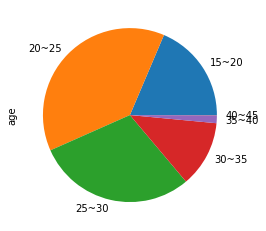

In [52]:
bin_counts.plot(kind='pie')
plt.show()